<h2><center><font color=#D40004><u>CNN Architectures for Image Classification</u></font></center></h2>
<br>
<div style="padding: 15px; max-width: 95%; margin: auto; background: linear-gradient(135deg, #f5f7fa, #cdd2d8); border: 2px groove #d1d8e0; border-radius: 15px; box-shadow: 0 5px 15px rgba(0,0,0,0.1); font-size: 90%; line-height: 1.5; color: #333; font-family: 'Georgia', serif; text-align: justify; position: relative;">
<p>The CIFAR-10 dataset is a widely recognized benchmark in computer vision. The challenge lies in developing a Convolutional Neural Network (CNN) capable of accurately classifying these images into their respective categories. Given the small size and visual similarity of the images, this task poses significant challenges, making it an excellent opportunity to explore and evaluate different CNN architectures. Our goal is to build a model that can achieve classification accuracy well above random chance (10%) and demonstrate its effectiveness through various performance metrics.</p>

# 📷 Cifar-10 Image Classifiction

The `CIFAR-10` dataset consists of `60000` `32x32` color images in `10` classes, with `6000` images per class. There are `50000` training images and `10000` test images.

# 🔬 Problem Definition:

Given an image, can we predict the correct class of this image?

The images are very small (`32x32`) and by visualizing them you will notice how difficult it is to distinguish them even for a human. 

In this notebook we are going to build a CNN model that can classify images of various objects. We have `10` class of images:
1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

# 🎯 Evaluation:

We have `10` classes, so if we pick a image and we randomly gues it class, we have `1/10` probability to be true.

<a id="contents_tabel"></a>  
<div style="padding: 30px; max-width: 95%;color:white; margin:10; font-size:100%; text-align:center; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'></span></b> <b>Table of Content</b></div>

* [1. Loading and Importing Libraries](#1)
* [2. Data Preparation](#2)
    - [2.1 Load the data](#2-1)
    - [2.1 Data visualisation](#2-2)
    - [2.1 Data processing](#2-3)
* [3. Model building](#3)
     - [3.1 LeNet-5](#3-1)
     - [3.2 AlexNet](#3-2)
     - [3.3 VGG-net](#3-3)
     - [3.4 GoogleNet](#3-4)
* [4. Performance on an Out-of-Dataset Image](#4)

<a id='1'></a>
# <div style="padding: 30px; max-width: 95%;color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>1 |</span></b> <b>Loading and Importing Libraries</b></div> 

In [1]:
#pip install tensorflow

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,  Conv2D, MaxPool2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Concatenate, AvgPool2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras import layers 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

2024-08-20 16:08:46.430168: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-20 16:08:46.430280: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-20 16:08:46.599495: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<a id='2'></a>
# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>2 |</span></b> <b>Data Preparation</b></div>

* [Contents tabel](#contents_tabel)


<a id='2-1'></a>
## <div style="padding: 15px; max-width: 95%;color:white; margin:10; font-size:70%; text-align:left; display:fill; border-radius:10px; background-color:#4a4a4a"><b><span style='color:#dddd2d'>2.1 |</span></b> <b>📥 Load the Data</b></div>

In [3]:
(X_train, y_train), (X_test, y_test)= cifar10.load_data()
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)



<a id='2-2'></a>
## <div style="padding: 15px; max-width: 95%;color:white; margin:10; font-size:70%; text-align:left; display:fill; border-radius:10px; background-color:#4a4a4a"><b><span style='color:#dddd2d'>2.3 |</span></b> <b>🖼 Data Visualization</b></div>

/tmp/ipykernel_34/260140420.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(y_train[index])


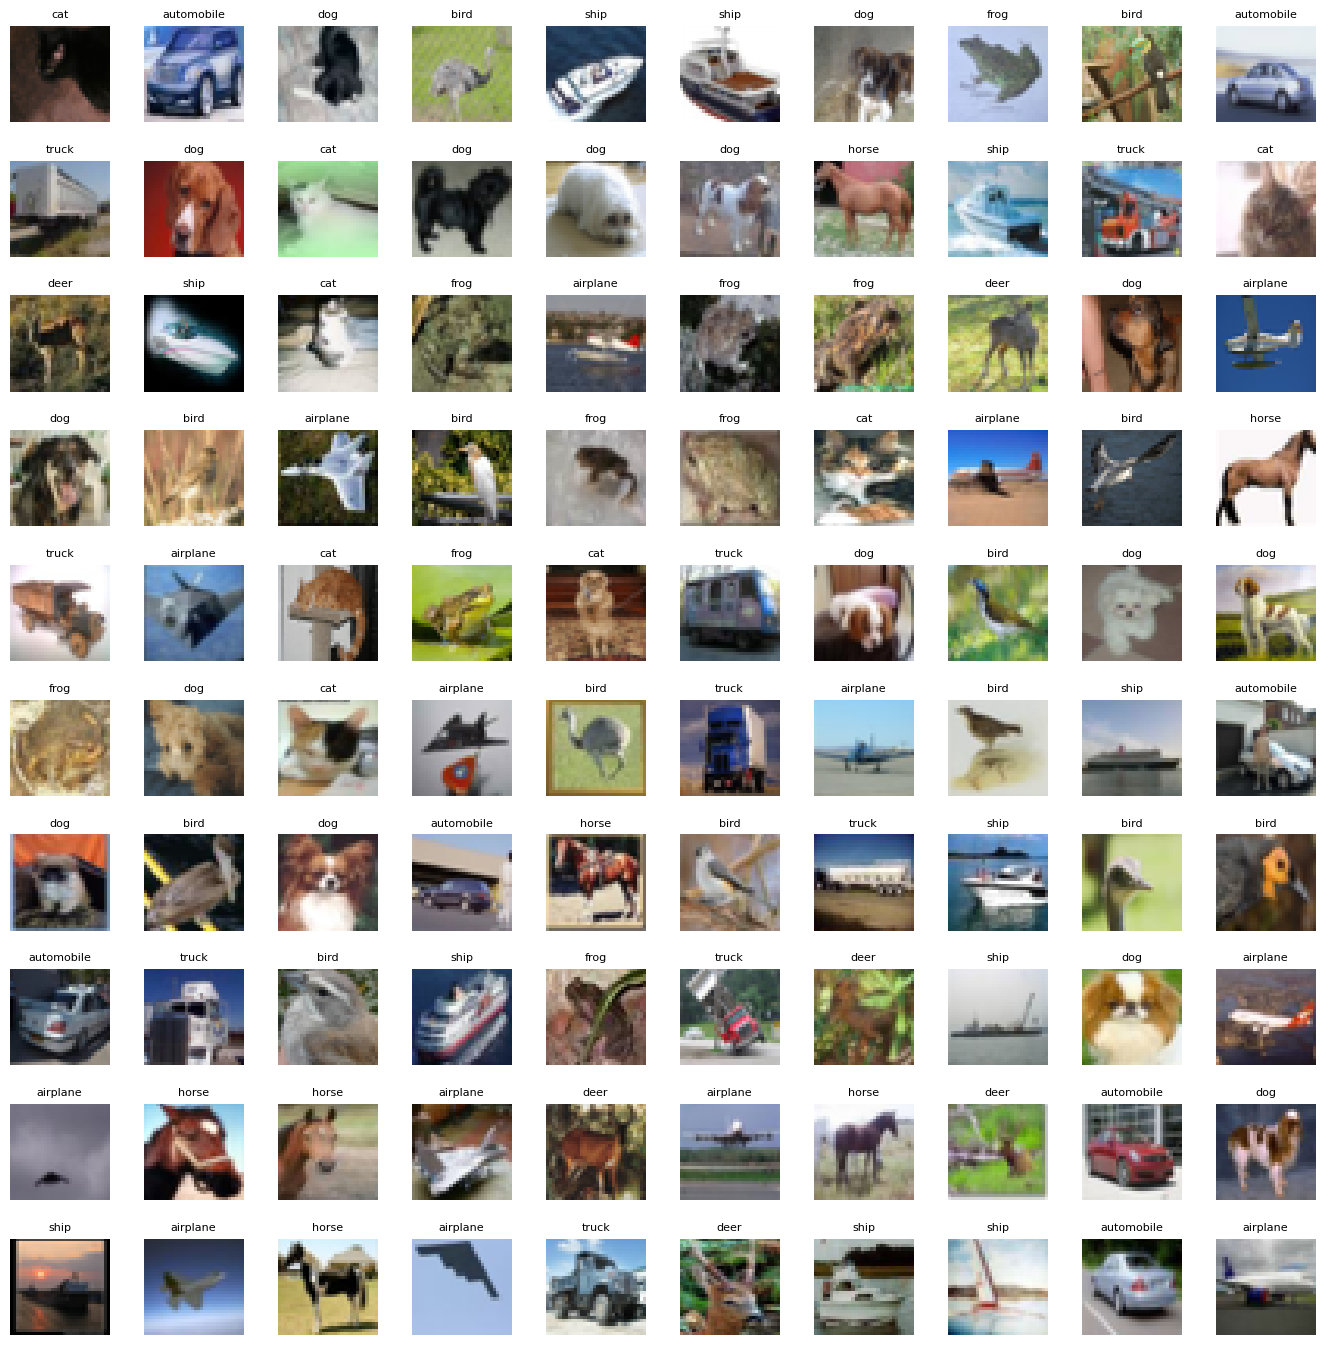

In [4]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

## class distribution

Text(0.5, 1.0, 'Class distribution in training set')

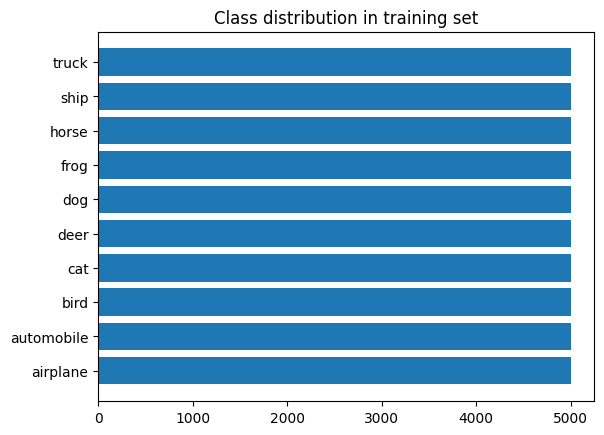

In [5]:
classes_name=['airplane', 'automobile', 'bird', 'cat', 'deer', 
              'dog', 'frog', 'horse', 'ship', 'truck']
classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in training set')

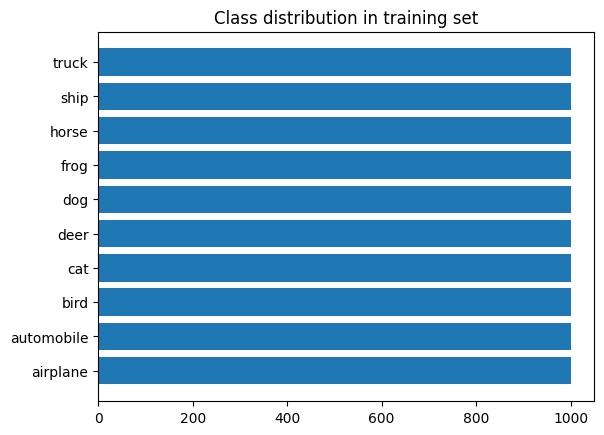

In [6]:
classes_name=['airplane', 'automobile', 'bird', 'cat', 'deer', 
              'dog', 'frog', 'horse', 'ship', 'truck']
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')


<a id='2-3'></a>
## <div style="padding: 15px;max-width: 95%; color:white; margin:10; font-size:70%; text-align:left; display:fill; border-radius:10px; background-color:#4a4a4a"><b><span style='color:#dddd2d'>2.3 |</span></b> <b>🔄 Data Preprocessing</b></div>

In [7]:
# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
#Transform target variable into one-hotencoding
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_cat_train, test_size=0.1, random_state=42)


<a id='2-4'></a>
## <div style="padding: 15px;max-width: 95%; color:white; margin:10; font-size:70%; text-align:left; display:fill; border-radius:10px; background-color:#4a4a4a"><b><span style='color:#dddd2d'>2.4 |</span></b> <b>🔄 Data Augmentation</b></div>

This will generate 5 augmented versions of each image from the training data. However, due to hardware limitations, I will fit the model using non-augmented data."

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    # Rotate images randomly by up to 15 degrees
    rotation_range=15,
    
    # Shift images horizontally by up to 12% of their width
    width_shift_range=0.12,
    
    # Shift images vertically by up to 12% of their height
    height_shift_range=0.12,
    
    # Randomly flip images horizontally
    horizontal_flip=True,
    
    # Zoom images in by up to 10%
    zoom_range=0.1,
    
    # Change brightness by up to 10%
    brightness_range=[0.9,1.1],

    # Shear intensity (shear angle in counter-clockwise direction in degrees)
    shear_range=10,
    
    # Channel shift intensity
    channel_shift_range=0.1,
)

# Setup arrays for augmented data
augmented_images = []
augmented_labels = []

# Define the number of augmented images you want to generate per original image
num_augmentations_per_image = 5

# Iterate over each image in the training data
for i in range(len(X_train)):
    # Reshape image for the ImageDataGenerator (batch size of 1)
    image = X_train[i:i+1]
    label = y_train[i:i+1]

    # Generate augmented images
    for batch in datagen.flow(image, batch_size=1):
        augmented_images.append(batch[0])
        augmented_labels.append(label[0])
        num_augmentations_per_image -= 1

        # Stop if we have generated the desired number of augmentations
        if num_augmentations_per_image <= 0:
            break

# Convert lists to numpy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Concatenate the original data with augmented data
X_train_augmented = np.concatenate((X_train, augmented_images), axis=0)
y_train_augmented = np.concatenate((y_train, augmented_labels), axis=0)

X_train=X_train_augmented
y_train=y_train_augmented

<a id='3'></a>
# <div style="padding: 30px; max-width: 95%;color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>3 |</span></b> <b>🤖 Model Building</b></div>

<a id='3-1'></a>
## <div style="padding: 15px;max-width: 95%; color:white; margin:10; font-size:70%; text-align:left; display:fill; border-radius:10px; background-color:#4a4a4a"><b><span style='color:#dddd2d'>3.1 |</span></b> <b> LeNet-5</b></div>
* [Contents tabel](#contents_tabel)

<br>

<div style="padding: 10px; max-width: 95%; margin: auto; background: linear-gradient(135deg, #f5f7fa, #cdd2d8); border: 3px groove #d1d8e0; border-radius: 15px; box-shadow: 0 5px 15px rgba(0,0,0,0.1); font-size: 95%; line-height: 1.5; color: #333; font-family: 'Georgia', serif; text-align: justify; position: relative;">
<p>LeNet-5 is one of the pioneering convolutional neural network (CNN) architectures, designed by Yann LeCun and his colleagues in 1998. It was primarily developed for handwritten digit recognition in the MNIST dataset but has influenced many modern CNN designs.

LeNet-5 consists of seven layers, excluding the input layer, which include convolutional layers, subsampling (or pooling) layers, and fully connected layers. For more details </p>
<p> <a href="https://deeplearningofpython.blogspot.com/2023/04/AlexnetArchitecture-CNN-Implementation.html">https://deeplearningofpython.blogspot.com/2023/04/AlexnetArchitecture-CNN-Implementation.html</a>
</div>

In [12]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model = Sequential([

    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,469,994 (5.61 MB)

 Trainable params: 1,469,994 (5.61 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_val, y_val))

Epoch 1/200
 11/317 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.0717 - loss: 2.3075  

W0000 00:00:1724111895.921117     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2394 - loss: 2.0013

W0000 00:00:1724111907.970608     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724111909.026226     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


317/317 ━━━━━━━━━━━━━━━━━━━━ 26s 46ms/step - accuracy: 0.2397 - loss: 2.0007 - val_accuracy: 0.4493 - val_loss: 1.5175
Epoch 2/200
 11/317 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4799 - loss: 1.4558

W0000 00:00:1724111910.554240     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


317/317 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4875 - loss: 1.4115 - val_accuracy: 0.5787 - val_loss: 1.1503
Epoch 3/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5932 - loss: 1.1450 - val_accuracy: 0.6367 - val_loss: 1.0150
Epoch 4/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6497 - loss: 0.9892 - val_accuracy: 0.6869 - val_loss: 0.8856
Epoch 5/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6955 - loss: 0.8680 - val_accuracy: 0.7156 - val_loss: 0.8231
Epoch 6/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7185 - loss: 0.8080 - val_accuracy: 0.7402 - val_loss: 0.7337
Epoch 7/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7497 - loss: 0.7145 - val_accuracy: 0.7604 - val_loss: 0.7015
Epoch 8/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7636 - loss: 0.6756 - val_accuracy: 0.7582 - val_loss: 0.7069
Epoch 9/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7843 - loss: 0.6150 - val_accuracy

In [22]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_cat_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

 63/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8124 - loss: 1.1243

W0000 00:00:1724112643.319168     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8044 - loss: 1.2184
Test loss: 1.2483925819396973
Test accuracy: 0.7993999719619751


W0000 00:00:1724112645.390203     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


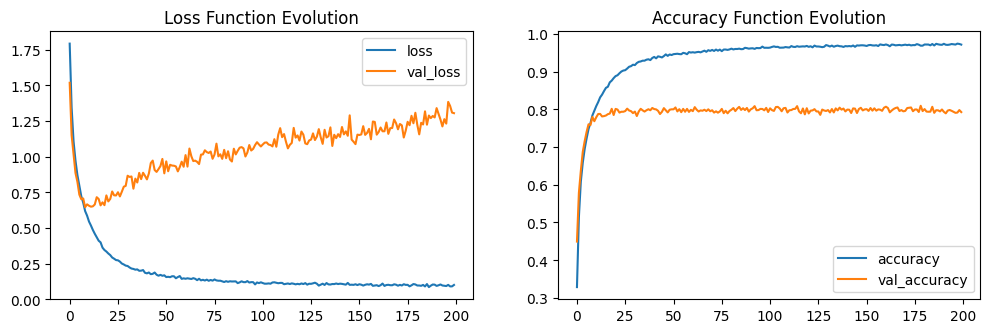

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.show()

<br>
<div style="padding: 10px; max-width: 95%; margin: auto; background: linear-gradient(135deg, #f5f7fa, #cdd2d8); border: 3px groove #d1d8e0; border-radius: 15px; box-shadow: 0 5px 15px rgba(0,0,0,0.1); font-size: 95%; line-height: 1.5; color: #333; font-family: 'Georgia', serif; text-align: justify; position: relative;">
<p>We can see that from the 11th epoch onward, the validation loss increases while the training loss continues to decrease until it reaches a value near 0.1. the model best predicts training data, while it does not predict the validation data. This indicates that our model is overfitting. we can apply batch normalisation to reduce the overfitting trend of the model.  </p>
</div>

<a id='3-2'></a>
## <div style="padding: 15px;max-width: 95%; color:white; margin:5; font-size:70%; text-align:left; display:fill; border-radius:10px; background-color:#4a4a4a"><b><span style='color:#dddd2d'>3.2 |</span></b> <b> AlexNet</b></div>
* [Contents tabel](#contents_tabel)

<br>
<div style="padding: 10px; max-width: 95%; margin: auto; background: linear-gradient(135deg, #f5f7fa, #cdd2d8); border: 3px groove #d1d8e0; border-radius: 15px; box-shadow: 0 5px 15px rgba(0,0,0,0.1); font-size: 95%; line-height: 1.5; color: #333; font-family: 'Georgia', serif; text-align: justify; position: relative;">
<p>AlexNet is a pioneering Convolutional Neural Network (CNN) architecture that significantly advanced the field of deep learning, particularly in image classification tasks. Developed by Alex Krizhevsky and his team, it won the 2012 ImageNet Large Scale Visual Recognition Challenge (ILSVRC) with a substantial margin. For a concise overview: check this URL </p>
<p> <a href="https://deeplearningofpython.blogspot.com/2023/04/AlexnetArchitecture-CNN-Implementation.html">https://deeplearningofpython.blogspot.com/2023/04/AlexnetArchitecture-CNN-Implementation.html</a>
</div>

In [24]:
from tensorflow.keras.layers import Input
# Define the model
model = Sequential()

# Input layer
model.add(Input(shape=(32, 32, 3)))

# First Convolutional Block
model.add(Conv2D(filters=96, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=2, padding="same"))
model.add(Dropout(0.4))

# Second Convolutional Block
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=2, padding="same"))
model.add(Dropout(0.4))

# Third Convolutional Block
model.add(Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=2, padding="same"))
model.add(Dropout(0.4))

# Fully connected layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 96)     │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16, 16, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 256)    │       221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 8, 8, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,927,754 (140.87 MB)

 Trainable params: 36,926,538 (140.86 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [26]:
# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
  3/317 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - accuracy: 0.1289 - loss: 28.1878 

W0000 00:00:1724112900.873544     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.1860 - loss: 4.4905

W0000 00:00:1724112927.000449     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724112928.188375     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


317/317 ━━━━━━━━━━━━━━━━━━━━ 50s 93ms/step - accuracy: 0.1862 - loss: 4.4840 - val_accuracy: 0.1002 - val_loss: 70.6267
Epoch 2/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.4014 - loss: 1.6075 - val_accuracy: 0.1500 - val_loss: 5.6134
Epoch 3/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.5053 - loss: 1.3321 - val_accuracy: 0.4258 - val_loss: 1.6803
Epoch 4/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.5801 - loss: 1.1660 - val_accuracy: 0.5960 - val_loss: 1.1682
Epoch 5/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.6247 - loss: 1.0523 - val_accuracy: 0.6276 - val_loss: 1.0671
Epoch 6/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.6628 - loss: 0.9475 - val_accuracy: 0.6276 - val_loss: 1.0987
Epoch 7/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.6924 - loss: 0.8540 - val_accuracy: 0.6618 - val_loss: 1.0470
Epoch 8/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.7174 - loss: 0.7915 - val

In [27]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_cat_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8352 - loss: 1.0228
Test loss: 1.0169785022735596
Test accuracy: 0.8334000110626221


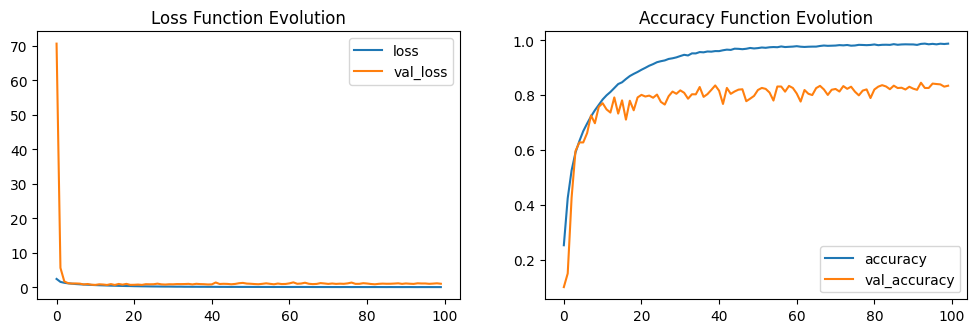

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.show()

In [29]:
# Save the entire model
model.save('/kaggle/working/AlexNet_Model.h5')

<a id='3-3'></a>
## <div style="padding: 15px;max-width: 95%; color:white; margin:10; font-size:70%; text-align:left; display:fill; border-radius:10px; background-color:#4a4a4a"><b><span style='color:#dddd2d'>3.3 |</span></b> <b> VGG</b></div>
* [Contents tabel](#contents_tabel)

<br>
<div style="padding: 10px; max-width: 95%; margin: auto; background: linear-gradient(135deg, #f5f7fa, #cdd2d8); border: 3px groove #d1d8e0; border-radius: 15px; box-shadow: 0 5px 15px rgba(0,0,0,0.1); font-size: 95%; line-height: 1.5; color: #333; font-family: 'Georgia', serif; text-align: justify; position: relative;">
<p>VGG (Visual Geometry Group) is a notable Convolutional Neural Network (CNN) architecture developed by the Visual Geometry Group at the University of Oxford. It was introduced in the 2014 paper "Very Deep Convolutional Networks for Large-Scale Image Recognition" by Karen Simonyan and Andrew Zisserman. The VGG network is known for its simplicity and effectiveness, particularly in image classification tasks. </p>
<p> <a href="https://deeplearningofpython.blogspot.com/2023/04/VGG-Architecture-implementation%20with%20Keras.html">https://deeplearningofpython.blogspot.com/2023/04/VGG-Architecture-implementation%20with%20Keras.html</a>
</div>

In [30]:
from tensorflow.keras.layers import Input
# Define the model
model = Sequential()

# Input layer
model.add(Input(shape=(32, 32, 3)))

# First Convolutional Block
model.add(Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu'))
model.add(Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="same"))
model.add(Dropout(0.4))

# Second Convolutional Block
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="same"))
model.add(Dropout(0.4))

# Third Convolutional Block
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="same"))
model.add(Dropout(0.4))

# fourth Convolutional Block
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="same"))
model.add(Dropout(0.4))

# fifth Convolutional Block
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="same"))
model.add(Dropout(0.4))

# Fully connected layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,80

 Total params: 33,644,106 (128.34 MB)

 Trainable params: 33,641,162 (128.33 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [32]:
# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
  2/317 ━━━━━━━━━━━━━━━━━━━━ 24s 79ms/step - accuracy: 0.0820 - loss: 7.9520   

W0000 00:00:1724114568.337744     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.1507 - loss: 2.8654

W0000 00:00:1724114604.416961     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724114605.913086     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


317/317 ━━━━━━━━━━━━━━━━━━━━ 69s 128ms/step - accuracy: 0.1508 - loss: 2.8633 - val_accuracy: 0.0964 - val_loss: 3.4510
Epoch 2/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.2831 - loss: 1.7957 - val_accuracy: 0.3424 - val_loss: 1.7316
Epoch 3/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.4138 - loss: 1.4967 - val_accuracy: 0.4304 - val_loss: 1.6902
Epoch 4/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.5354 - loss: 1.2722 - val_accuracy: 0.5889 - val_loss: 1.1886
Epoch 5/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.6170 - loss: 1.0845 - val_accuracy: 0.6131 - val_loss: 1.1153
Epoch 6/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.6670 - loss: 0.9569 - val_accuracy: 0.6087 - val_loss: 1.2606
Epoch 7/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.7075 - loss: 0.8500 - val_accuracy: 0.7149 - val_loss: 0.8322
Epoch 8/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.7362 - loss: 0.7669 - val

In [33]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_cat_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8536 - loss: 0.7989
Test loss: 0.8133184313774109
Test accuracy: 0.8503000140190125


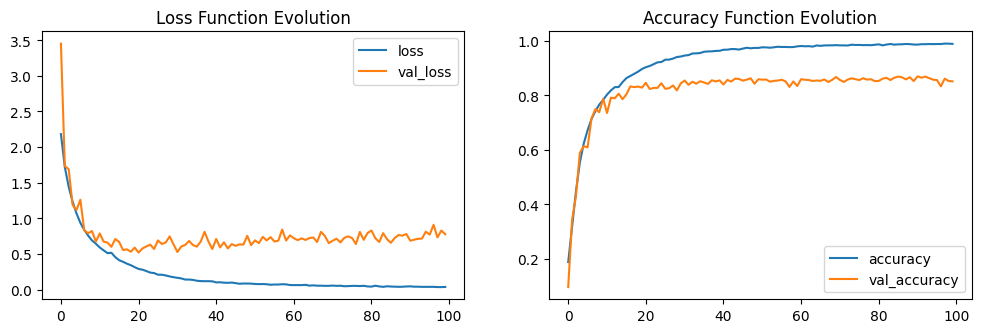

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.show()

In [35]:
# Save the entire model
model.save('/kaggle/working/VGG_Model.h5')

 <a id='3-4'></a>
## <div style="padding: 15px;max-width: 95%; color:white; margin:10; font-size:70%; text-align:left; display:fill; border-radius:10px; background-color:#4a4a4a"><b><span style='color:#dddd2d'>3.4 |</span></b> <b> GoogleNet</b></div>
* [Contents tabel](#contents_tabel)

<br>
<div style="padding: 10px; max-width: 95%; margin: auto; background: linear-gradient(135deg, #f5f7fa, #cdd2d8); border: 3px groove #d1d8e0; border-radius: 15px; box-shadow: 0 5px 15px rgba(0,0,0,0.1); font-size: 95%; line-height: 1.5; color: #333; font-family: 'Georgia', serif; text-align: justify; position: relative;">
<p>GoogLeNet is a convolutional neural network architecture introduced by Google researchers in the paper "Going Deeper with Convolutions" at the IEEE Conference on Computer Vision and Pattern Recognition (CVPR) 2015. It is known for its innovative use of Inception modules, which allowed it to achieve high performance while maintaining relatively low computational complexity. Refer to this link to read more about this architecture: </p>
<p> <a href="https://deeplearningofpython.blogspot.com/2023/04/GoogleNet-Architecture-Keras.html">https://deeplearningofpython.blogspot.com/2023/04/GoogleNet-Architecture-Keras.html</a>
</div>

In [65]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Concatenate, Input, Dense, Flatten, Dropout, AveragePooling2D
from tensorflow.keras.models import Model

def inception_block(x, f):
    t1 = Conv2D(f[0], 1, activation='relu')(x)
    
    t2 = Conv2D(f[1], 1, activation='relu')(x)
    t2 = Conv2D(f[2], 3, padding='same', activation='relu')(t2)
    
    t3 = Conv2D(f[3], 1, activation='relu')(x)
    t3 = Conv2D(f[4], 5, padding='same', activation='relu')(t3)
    
    t4 = MaxPooling2D(3, strides=1, padding='same')(x)
    t4 = Conv2D(f[5], 1, activation='relu')(t4)
    
    output = Concatenate()([t1, t2, t3, t4])
    return output

def googlenet(input_shape, n_classes):
    input_layer = Input(shape=input_shape)
    
    # Adjust the stride and kernel size for smaller input images
    x = Conv2D(64, 3, strides=1, padding='same', activation='relu')(input_layer)
    x = MaxPooling2D(3, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    
    x = Conv2D(64, 1, activation='relu')(x)
    x = Conv2D(192, 3, padding='same', activation='relu')(x)
    x = MaxPooling2D(3, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    
    x = inception_block(x, [64, 96, 128, 16, 32, 32])
    x = inception_block(x, [128, 128, 192, 32, 96, 64])
    x = MaxPooling2D(3, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    
    x = inception_block(x, [192, 96, 208, 16, 48, 64])
    x = inception_block(x, [160, 112, 224, 24, 64, 64])
    #x = inception_block(x, [128, 128, 256, 24, 64, 64])
    
    # Remove the fourth inception block to maintain spatial dimensions
    # x = inception_block(x, [112, 144, 288, 32, 64, 64])
    
    x = inception_block(x, [256, 160, 320, 32, 128, 128])
    x = MaxPooling2D(3, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    
    x = inception_block(x, [256, 160, 320, 32, 128, 128])
    x = inception_block(x, [384, 192, 384, 48, 128, 128])
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    
    x = AveragePooling2D(2, strides=1)(x)  # Reduced size to fit the smaller input
    x = Dropout(0.4)(x)
    
    x = Flatten()(x)
    output_layer = Dense(n_classes, activation='softmax')(x)
    
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

In [66]:
model = googlenet((32, 32, 3), 10)
#model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [67]:
# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100

  3/352 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - accuracy: 0.1124 - loss: 3.0383 

W0000 00:00:1724082512.279035     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.2854 - loss: 2.0836

W0000 00:00:1724082543.897081     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update

W0000 00:00:1724082546.956073     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


352/352 ━━━━━━━━━━━━━━━━━━━━ 70s 105ms/step - accuracy: 0.2856 - loss: 2.0827 - val_accuracy: 0.0970 - val_loss: 6.9757

Epoch 2/100

  3/352 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - accuracy: 0.5547 - loss: 1.2194

W0000 00:00:1724082549.278605     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.5353 - loss: 1.2795 - val_accuracy: 0.4636 - val_loss: 1.6751

Epoch 3/100

352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.6244 - loss: 1.0574 - val_accuracy: 0.4850 - val_loss: 1.6478

Epoch 4/100

352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.6914 - loss: 0.8859 - val_accuracy: 0.5850 - val_loss: 1.2814

Epoch 5/100

352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.7252 - loss: 0.7918 - val_accuracy: 0.6080 - val_loss: 1.2643

Epoch 6/100

352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.7535 - loss: 0.7116 - val_accuracy: 0.6852 - val_loss: 0.9099

Epoch 7/100

352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.7745 - loss: 0.6551 - val_accuracy: 0.6978 - val_loss: 0.9075

Epoch 8/100

352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.7936 - loss: 0.6072 - val_accuracy: 0.6548 - val_loss: 1.0312

Epoch 9/100

352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.8020 - loss:

IOPub message rate exceeded.

The notebook server will temporarily stop sending output

to the client in order to avoid crashing it.

To change this limit, set the config variable

`--NotebookApp.iopub_msg_rate_limit`.



Current values:

NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)

NotebookApp.rate_limit_window=3.0 (secs)




352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9807 - loss: 0.0555 - val_accuracy: 0.8386 - val_loss: 0.7193

Epoch 78/100

352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9822 - loss: 0.0535 - val_accuracy: 0.8364 - val_loss: 0.7332

Epoch 79/100

352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9837 - loss: 0.0486 - val_accuracy: 0.8242 - val_loss: 0.8005

Epoch 80/100

352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9807 - loss: 0.0565 - val_accuracy: 0.7916 - val_loss: 1.0076

Epoch 81/100

352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9819 - loss: 0.0523 - val_accuracy: 0.8334 - val_loss: 0.7522

Epoch 82/100

352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9814 - loss: 0.0537 - val_accuracy: 0.8472 - val_loss: 0.6195

Epoch 83/100

352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9839 - loss: 0.0502 - val_accuracy: 0.8260 - val_loss: 0.7855

Epoch 84/100

352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9811 

IOPub message rate exceeded.

The notebook server will temporarily stop sending output

to the client in order to avoid crashing it.

To change this limit, set the config variable

`--NotebookApp.iopub_msg_rate_limit`.



Current values:

NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)

NotebookApp.rate_limit_window=3.0 (secs)




In [68]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_cat_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

 21/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8350 - loss: 0.6911

W0000 00:00:1724083766.806146     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8250 - loss: 0.7804

Test loss: 0.8054634928703308

Test accuracy: 0.8220999836921692


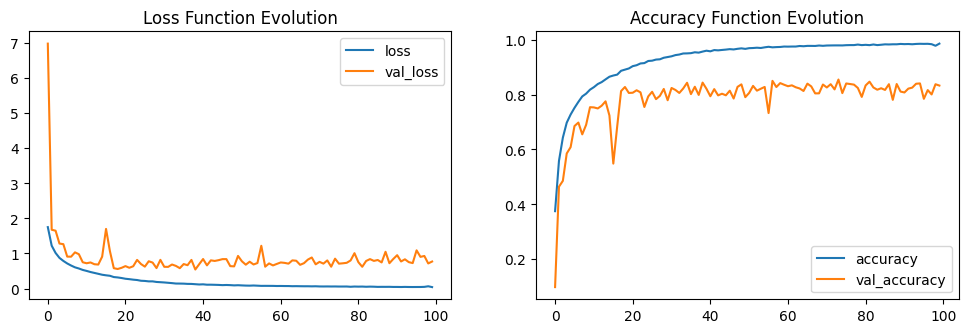

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.show()

<a id='4'></a>
# <div style="padding: 30px; max-width: 95%;color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>4 |</span></b> <b>Performance on an Out-of-Dataset Image</b></div>
* [Contents tabel](#contents_tabel)

## A summary of results of each model

In [27]:
import pandas as pd

# Sample data
data = {
    'Model': ['LeNet-5', 'AlexNet', 'VGGnet', 'GoogleNet'],
    'Loss': [1.24, 1.01, 0.81, 0.82],
    'Accuracy': [0.79, 0.83, 0.85, 0.80],
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Display the table
df

,Model,Loss,Accuracy
0,LeNet-5,1.24,0.79
1,AlexNet,1.01,0.83
2,VGGnet,0.81,0.85
3,GoogleNet,0.82,0.80


<br>

<div style="padding: 10px; max-width: 95%; margin: auto; background: linear-gradient(135deg, #f5f7fa, #cdd2d8); border: 3px groove #d1d8e0; border-radius: 15px; box-shadow: 0 5px 15px rgba(0,0,0,0.1); font-size: 95%; line-height: 1.5; color: #333; font-family: 'Georgia', serif; text-align: justify; position: relative;">
<p>Here is the link to the model (VggNet)</p>
<p> <a href="https://www.kaggle.com/models/hamidalalou/vggmodel/">https://www.kaggle.com/models/hamidalalou/vggmodel/</a>
</div>

In [5]:
# LOAD THE MODEL (VGG model)
model_path = '/kaggle/input/vggmodel/tensorflow1/default/1/VGG_Model.h5'
model = tf.keras.models.load_model(model_path)

## Exemple 1

In [19]:
import urllib.request
import cv2
# Fetch the raw image from GitHub
url = "https://raw.githubusercontent.com/FarzadNekouee/Keras-CIFAR10-CNN-Model/master/truck_sample.png"
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_UNCHANGED)

# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

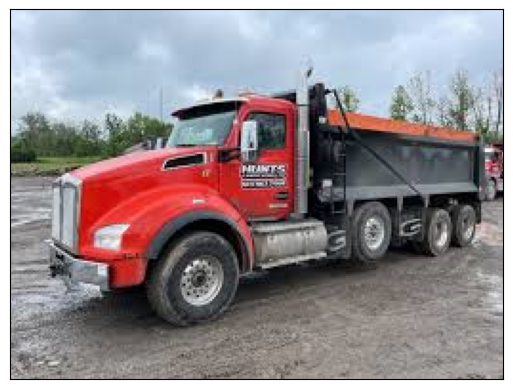

In [20]:
# Display the image
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [21]:
# We need to preprocess it in the same way as we did with the training and test data:
# Resize it to 32x32 pixels
image = cv2.resize(image, (32,32))
image= image/255.0

# Add an extra dimension because the model expects a batch of images
image = image.reshape((1, 32, 32, 3))

prediction = model.predict(image)

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# get the index of the hight probability
predicted_class = prediction.argmax()

print('Predicted class: ', labels[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class:  truck


## Exemple 2

In [23]:
import urllib.request
import cv2
# Fetch the raw image from GitHub
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTI92aLDl5D1l6hJwPQmOEXFyRNQRAJ2PA-9Q&s"
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_UNCHANGED)

# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

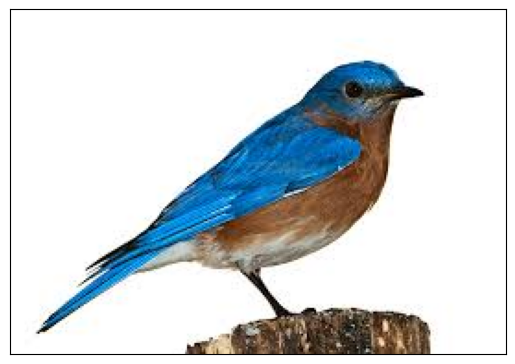

In [24]:
# Display the image
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [25]:
# We need to preprocess it in the same way as we did with the training and test data:
# Resize it to 32x32 pixels
image = cv2.resize(image, (32,32))
image= image/255.0

# Add an extra dimension because the model expects a batch of images
image = image.reshape((1, 32, 32, 3))

prediction = model.predict(image)

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# get the index of the hight probability
predicted_class = prediction.argmax()

print('Predicted class: ', labels[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class:  bird
